<a href="https://colab.research.google.com/github/idosoriole/Osorio-Leon-EnvControls-CellsAttached/blob/main/Landlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
# np.int = np.int64
import landlab as landlab
from landlab import RasterModelGrid, imshow_grid
from landlab.components import (FlowAccumulator, FastscapeEroder, LinearDiffuser, StreamPowerEroder) #FlowRouter, PrecipitationDistribution, SinkFiller,DepressionFinderAndRouter)
from landlab.io.esri_ascii import read_esri_ascii, write_esri_ascii
from matplotlib.pyplot import (plot, title, xlabel, ylabel,
                               show, figure, legend, gca, loglog, ylim)
from landlab.plot.drainage_plot import drainage_plot
# from landlab.plot import analyze_channel_network_and_plot
import matplotlib as plt
import scipy as scipy
import scipy.io as sio

# %matplotlib inline

In [4]:
mg = RasterModelGrid((41, 15), 5.)

#Assign rugosity to a slope and use it as topography
elev_values = np.arange(mg.number_of_nodes, dtype=float)*0.3
elev_values = elev_values[::-1] #Invert array order for convenience
np.random.seed(0)
roughness = np.random.rand(elev_values.size)*3
input_topography = elev_values + roughness

z_vals = mg.add_field('topographic__elevation', input_topography, at = 'node', copy=False,
                     units='m', clobber=True)

In [6]:
mg.set_closed_boundaries_at_grid_edges(True, True, True, False)

Text(0.5, 1.0, 'coupe de la topographie initiale')

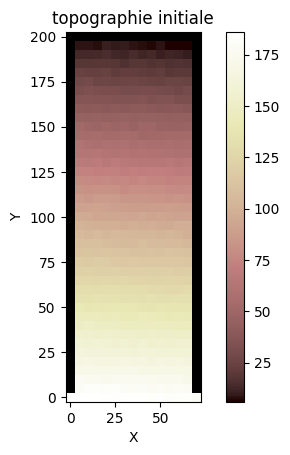

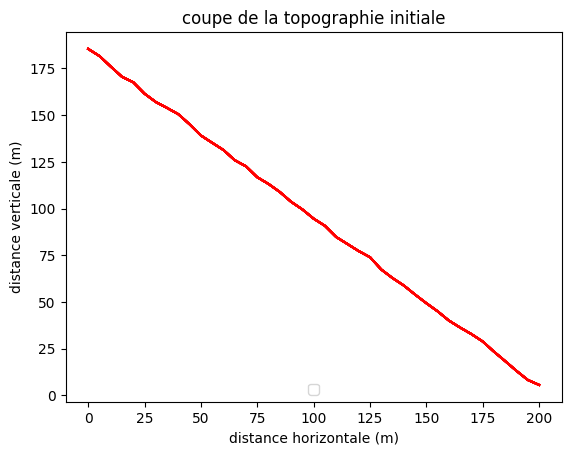

In [10]:
figure(1)
imshow_grid(mg, 'topographic__elevation')
title('topographie initiale')
figure(2)
elev_rast = mg.node_vector_to_raster(
            mg.at_node['topographic__elevation'])
plot(mg.node_vector_to_raster(mg.node_y), elev_rast[:, 2], 'r-')
# ylim((-5,50)) #may want to change upper limit if D changes
xlabel('distance horizontale (m)')
ylabel('distance verticale (m)')
legend(loc='lower center')
title('coupe de la topographie initiale')

In [20]:
grid = RasterModelGrid((5, 5), 10.)
z = np.array([7.,  7.,  7.,  7.,  7.,
             7.,  5., 3.2,  6.,  7.,
             7.,  2.,  3.,  5.,  7.,
             7.,  1., 1.9,  4.,  7.,
             7.,  0.,  7.,  7.,  7.])

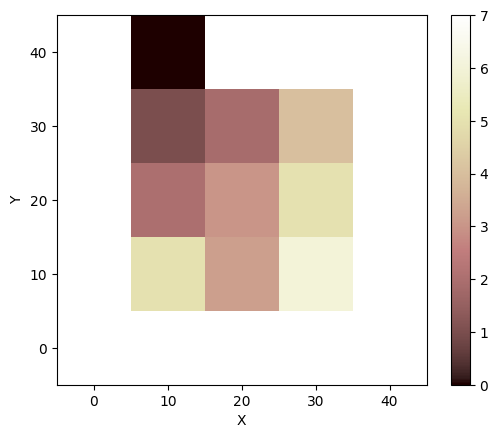

In [21]:
z = grid.add_field('topographic__elevation', z, at='node', noclobber=False)
imshow_grid(grid,grid.at_node['topographic__elevation'])

In [56]:
from landlab.components import FlowDirectorD8, FlowAccumulator, ErosionDeposition

In [57]:
ErosionDeposition.input_var_names

('flow__link_to_receiver_node',
 'flow__receiver_node',
 'flow__upstream_node_order',
 'surface_water__discharge',
 'topographic__elevation',
 'topographic__steepest_slope')

In [59]:
# fr = FlowDirectorD8(grid)
fa = FlowAccumulator(grid, surface = 'topographic__elevation', flow_director = 'FlowDirectorD8')
sp = FastscapeEroder(grid, K_sp = 1)#, m_sp = 0.5, n_sp = 1, discharge_field = "drainage_area", erode_flooded_nodes = True)#, threshold_sp=0)
fr.run_one_step()
sp.run_one_step(dt = 1)

IndexError: Out of bounds on buffer access (axis 0)

In [48]:
grid.at_node.keys()

['topographic__elevation',
 'flow__link_to_receiver_node',
 'flow__receiver_node',
 'topographic__steepest_slope',
 'surface_water__discharge',
 'water__unit_flux_in',
 'drainage_area',
 'flow__data_structure_delta',
 'flow__upstream_node_order',
 'flow__sink_flag']

In [22]:
from landlab.components import FlowDirectorD8, FlowAccumulator
# fa = FlowAccumulator(mg, "topographic__elevation", flow_director="FlowDirectorSteepest")
fr = FlowDirectorD8(grid)
K_sp=1
seuil=((1e3)**0.5)*K_sp*2e-2
sp = FastscapeEroder(grid, K_sp=K_sp, threshold_sp=seuil)
fr.run_one_step()
sp.run_one_step(dt = 1e-6)
imshow_grid(grid, grid.at_node['topographic__elevation'])

FieldError: FastscapeEroder is missing required input field: drainage_area at node